In [1]:
import h5py
#from plotting import plot_trajectory_data, plot_histogram

In [2]:
# Open the 1D data files
EM_orig = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/1D_75M/euler_maruyama1D.h5", "r")
NLM_orig = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/1D_75M/naive_leimkuhler_matthews1D.h5", "r")
HLM_orig = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/1D_75M/hummer_leimkuhler_matthews1D.h5", "r")
EM_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/transformed/time_transform_75M/euler_maruyama1D.h5", "r")
NLM_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/transformed/time_transform_75M/naive_leimkuhler_matthews1D.h5", "r")
EM_space = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/transformed/space_transform_75M/euler_maruyama1D.h5", "r")
NLM_space = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/transformed/space_transform_75M/naive_leimkuhler_matthews1D.h5", "r")
LM_orig = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/baoab_limit_method_50M/leimkuhler_matthews1D.h5", "r")
LM_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/transformed/baoab_limit_method_tt_50M/leimkuhler_matthews1D.h5", "r")

MM_orig = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/MM_10M/milstein_method1D.h5", "r") # TODO: Update with 75M experiment
SH_orig = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/1D_75M/stochastic_heun1D.h5", "r")  # TODO: Update with 75M experiment
SH_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/transformed/time_transform_75M/stochastic_heun1D.h5", "r")
SH_space = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell/variable_diff/transformed/space_transform_75M/stochastic_heun1D.h5", "r")

# EM_orig_extended = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/extended_EM/euler_maruyama1D.h5", "r")
# NLM_orig_extended = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/extended_LM/naive_leimkuhler_matthews1D.h5", "r")
# HLM_orig_extended = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/extended_HLM/hummer_leimkuhler_matthews1D.h5", "r")
# EM_time_extended = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/extended_EM_TR/euler_maruyama1D.h5", "r")
# NLM_time_extended = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/extended_LM_TR/naive_leimkuhler_matthews1D.h5", "r")
# EM_space_extended = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/extended_EM_Lamperti/euler_maruyama1D.h5", "r")
# NLM_space_extended = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/extended_LM_Lamperti/naive_leimkuhler_matthews1D.h5", "r")


In [6]:
# Open the 2D data files
EM_orig_2D = h5py.File("C:/Users/domph.000/JuliaProjects/LangevinIntegrators/outputs/MV_5M/euler_maruyama2D.h5", "r")
NLM_orig_2D = h5py.File("C:/Users/domph.000/JuliaProjects/LangevinIntegrators/outputs/MV_5M/naive_leimkuhler_matthews2D.h5", "r")
HLM_orig_2D = h5py.File("C:/Users/domph.000/JuliaProjects/LangevinIntegrators/outputs/MV_5M/hummer_leimkuhler_matthews2D.h5", "r")
SH_orig_2D = h5py.File("C:/Users/domph.000/JuliaProjects/LangevinIntegrators/outputs/MV_5M/stochastic_heun2D.h5", "r")

EM_TT_2D = h5py.File("C:/Users/domph.000/JuliaProjects/LangevinIntegrators/outputs/MV_5M_TT/euler_maruyama2D.h5", "r")
NLM_TT_2D = h5py.File("C:/Users/domph.000/JuliaProjects/LangevinIntegrators/outputs/MV_5M_TT/naive_leimkuhler_matthews2D.h5", "r")
SH_TT_2D = h5py.File("C:/Users/domph.000/JuliaProjects/LangevinIntegrators/outputs/MV_5M_TT/stochastic_heun2D.h5", "r")


In [25]:
# Data files for time complexity
EM_orig_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell_time_complexity/10^(-3)/EM_steps_to_0.001_uncertainty/euler_maruyama1D.h5", "r")
EM_TT_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell_time_complexity/10^(-3)/EM_TT_steps_to_0.001_uncertainty/euler_maruyama1D.h5", "r")   
EM_ST_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell_time_complexity/10^(-3)/EM_ST_steps_to_0.001_uncertainty/euler_maruyama1D.h5", "r")
LM_TT_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell_time_complexity/10^(-3)/LM_TT_steps_to_0.001_uncertainty/naive_leimkuhler_matthews1D.h5", "r")
LM_ST_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell_time_complexity/10^(-3)/LM_ST_steps_to_0.001_uncertainty/naive_leimkuhler_matthews1D.h5", "r")
HLM_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell_time_complexity/10^(-3)/HLM_steps_to_0.001_uncertainty/hummer_leimkuhler_matthews1D.h5", "r")
SH_orig_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell_time_complexity/10^(-3)/SH_steps_to_0.001_uncertainty/stochastic_heun1D.h5", "r")
SH_TT_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell_time_complexity/10^(-3)/SH_TT_steps_to_0.001_uncertainty/stochastic_heun1D.h5", "r")
SH_ST_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell_time_complexity/10^(-3)/SH_ST_steps_to_0.001_uncertainty/stochastic_heun1D.h5", "r")
MM_orig_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell_time_complexity/10^(-3)/MM_steps_to_0.001_uncertainty/milstein_method1D.h5", "r")
BAOAB_orig_time = h5py.File("/home/dominic/JuliaProjects/LangevinIntegrators/outputs/softwell_time_complexity/10^(-3)/BAOAB_steps_to_0.001_uncertainty/leimkuhler_matthews1D.h5", "r")

In [71]:
import matplotlib.pyplot as plt
import numpy as np

def plot_convergence(h5py_files, stepsizes=None, title=None, save=False, labels=None, colors=None, line_styles=None, number_of_points=None, alphas=None, marker_styles=None, error_points=None, ax=None, gradient_1_offset=0.014, gradient_2_offset=0.05):
    """
    Plot convergence to target measure. Reads in a h5py file and plots the data
    in the file. The file should contain a dataset called 'data'
    which is a 2D array of shape n where n is the number of
    points in the trajectory.
    """
    ax_provided = True
    if ax is None:
        ax = plt.gca()
        ax_provided = False
    if colors is None:
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'black']
    data_arrays = [h5py_file['data'] for h5py_file in h5py_files]
    for idx, data_array in enumerate(data_arrays):
        color_idx = idx % len(colors)
        if number_of_points:
            data_array_to_plot = data_array[:, len(stepsizes[idx])-number_of_points[idx]:len(stepsizes[idx])]
            stepsizes_to_plot = stepsizes[idx][len(stepsizes[idx])-number_of_points[idx]:len(stepsizes[idx])]
        ax.plot(stepsizes_to_plot, np.mean(data_array_to_plot, axis=0), color=colors[color_idx], linewidth=1, markersize=4, label= labels[idx] if labels else None, ls=line_styles[idx] if line_styles else '-', alpha=alphas[idx] if alphas else 1, markerfacecolor='none', markeredgewidth=1.25, markeredgecolor=colors[color_idx], marker=marker_styles[idx] if marker_styles else 'o')
        if error_points[idx] is not None:
            ax.plot(stepsizes[idx][len(stepsizes[idx])-error_points[idx][1]:len(stepsizes[idx])-error_points[idx][0]], np.mean(data_array[:, len(stepsizes[idx])-error_points[idx][1]:len(stepsizes[idx])-error_points[idx][0]], axis=0) + np.std(data_array[:, len(stepsizes[idx])-error_points[idx][1]:len(stepsizes[idx])-error_points[idx][0]], axis=0), ls='--', color=colors[color_idx], label="", alpha=0.25, linewidth=1)
            ax.plot(stepsizes[idx][len(stepsizes[idx])-error_points[idx][1]:len(stepsizes[idx])-error_points[idx][0]], np.mean(data_array[:, len(stepsizes[idx])-error_points[idx][1]:len(stepsizes[idx])-error_points[idx][0]], axis=0) - np.std(data_array[:, len(stepsizes[idx])-error_points[idx][1]:len(stepsizes[idx])-error_points[idx][0]], axis=0), ls='--', color=colors[color_idx], label="", alpha=0.25, linewidth=1)

    if not ax_provided:
        # plot a gradient one line on the log scale
        ax.plot(stepsizes[0][len(stepsizes[0])-9:len(stepsizes[0])], gradient_1_offset * stepsizes[0][len(stepsizes[0])-9:len(stepsizes[0])], color='black', linewidth=0.9, ls='--', alpha=0.2)
        ax.plot(stepsizes[0][len(stepsizes[0])-6:len(stepsizes[0])], gradient_2_offset * stepsizes[0][len(stepsizes[0])-6:len(stepsizes[0])]**2, color='black', linewidth=0.9, ls='--', alpha=0.2)

        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('Stepsize', fontsize=13)
        ax.set_ylabel('Error', fontsize=13)
        #plt.xticks(fontsize=11)
        #plt.yticks(fontsize=11)
        #plt.margins(x=0.075, y=0.075)
        # plt.legend()
        if title:
            ax.set_title(title)
        if save:
            plt.savefig(f"{title}.png")
            plt.savefig(f"{title}.pdf")

    return ax

In [72]:
# TODO: check x scale is correct for the baoab limit method!!

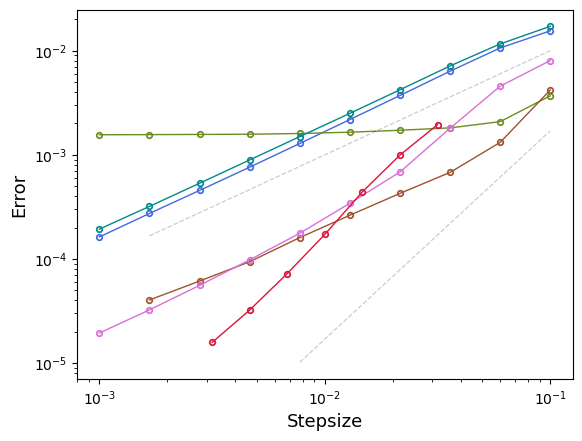

In [73]:
Color1 = (65/256, 105/256, 225/256) 
Color2 =  (107/256, 142/256, 35/256)
Color3 = (218/256, 112/256, 214/256) 
Color4 = (0/256, 139/256, 139/256)
Color5 = (160/256, 82/256, 45/256)
Color6 = (220/256, 20/256, 60/256)
colors = [Color1, Color2, Color5, Color4, Color3, Color6] #, Slate_Blue, Teal, Goldenrod, Maroon, Slate_Blue, Teal, Goldenrod] 
alphas = [1, 1, 1, 1, 1, 1] #, 1, 1, 1, 1, 1, 1, 1]
number_of_points = [10, 10, 9, 10, 10, 7] #, 10, 6, 7, 6, 10, 7, 8]
error_points = [None, None, None, None, None, None] #, None, None, (4, 6), (3,6), (5,7), None, (5,7), (6,8)]
labels = ["EM", "NLM", "HLM", "MM", "SH", "LM"] #, "EM_time_transformed", "NLM_time_transformed", "SH_time_transformed", "LM_time_transformed", "EM_space_transformed", "LM_space_transformed", "SH_space_transformed"]
line_styles = ['-', '-', '-', '-', '-', '-'] #, '--', '--', '--', '--', '-.', '-.', '-.']
marker_styles = ['o', 'o', 'o', 'o', 'o', 'o'] #, 's', 's', 's', 's', 'd', 'd', 'd']
stepsizes = [np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1.5, 10)]
ax = plot_convergence([EM_orig, NLM_orig, HLM_orig, MM_orig, SH_orig, LM_orig], error_points = error_points, marker_styles=marker_styles, line_styles = line_styles, alphas= alphas, colors=colors, number_of_points= number_of_points, labels=labels, stepsizes=stepsizes, save=True, gradient_1_offset=0.1, gradient_2_offset=0.17)

plt.savefig("convergence_orig.pdf")

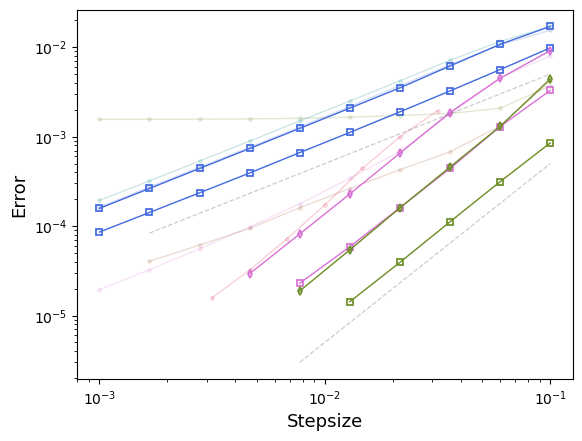

In [76]:
Color1 = (65/256, 105/256, 225/256) 
Color2 =  (107/256, 142/256, 35/256)
Color3 = (218/256, 112/256, 214/256) 
Color4 = (0/256, 139/256, 139/256)
Color5 = (160/256, 82/256, 45/256)
Color6 = (220/256, 20/256, 60/256)
colors = [Color1, Color2, Color5, Color4, Color3, Color6, Color1, Color2, Color3, Color1, Color2, Color3] 
alphas = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 1, 1, 1, 1, 1]
number_of_points = [10, 10, 9, 10, 10, 7, 10, 5, 6, 10, 6, 7]
error_points = [None, None, None, None, None, None, None, None, None, None, None, None, None]
labels = ["EM", "NLM", "HLM", "MM", "SH", "LM", "EM_time_transformed", "NLM_time_transformed", "SH_time_transformed", "EM_space_transformed", "LM_space_transformed", "SH_space_transformed"]
line_styles = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
marker_styles = ['.', '.', '.', '.', '.', '.', 's', 's', 's', 's', 'd', 'd', 'd']
stepsizes = [np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1.5, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10), np.logspace(-3, -1, 10)]
ax = plot_convergence([EM_orig, NLM_orig, HLM_orig, MM_orig, SH_orig, LM_orig, EM_time, NLM_time, SH_time, EM_space, NLM_space, SH_space], error_points = error_points, marker_styles=marker_styles, line_styles = line_styles, alphas= alphas, colors=colors, number_of_points= number_of_points, labels=labels, stepsizes=stepsizes, save=True, gradient_1_offset=0.05)

plt.savefig("convergence_transformed.pdf")

In [83]:
def plot_time_complexity(h5py_files, stepsizes=None, title=None, labels=None, colors=None, line_styles=None, alphas=None, marker_styles=None):
    ax = plt.gca()
    if colors is None:
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'black']
    data_arrays = [h5py_file['data'] for h5py_file in h5py_files]
    for idx, data_array in enumerate(data_arrays):
        color_idx = idx % len(colors)
        ax.plot(stepsizes[idx], np.mean(data_array, axis=0), color=colors[color_idx], linewidth=1.25, markersize=4, label= labels[idx] if labels else None, ls=line_styles[idx] if line_styles else '-', alpha=alphas[idx] if alphas else 1, markerfacecolor='none', markeredgewidth=1.25, markeredgecolor=colors[color_idx], marker=marker_styles[idx] if marker_styles else 'o')
        #if error_points[idx] is not None:
        #    ax.plot(stepsizes[len(stepsizes)-error_points[idx][1]:len(stepsizes)-error_points[idx][0]], np.mean(data_array[:, len(stepsizes)-error_points[idx][1]:len(stepsizes)-error_points[idx][0]], axis=0) + np.std(data_array[:, len(stepsizes)-error_points[idx][1]:len(stepsizes)-error_points[idx][0]], axis=0), ls='--', color=colors[color_idx], label="", alpha=0.25, linewidth=1)
        #    ax.plot(stepsizes[len(stepsizes)-error_points[idx][1]:len(stepsizes)-error_points[idx][0]], np.mean(data_array[:, len(stepsizes)-error_points[idx][1]:len(stepsizes)-error_points[idx][0]], axis=0) - np.std(data_array[:, len(stepsizes)-error_points[idx][1]:len(stepsizes)-error_points[idx][0]], axis=0), ls='--', color=colors[color_idx], label="", alpha=0.25, linewidth=1)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Stepsize', fontsize=13)
    ax.set_ylabel(r'Iterations to Error=$10^{-3}$', fontsize=13)
    if title:
        ax.set_title(title)

    return ax

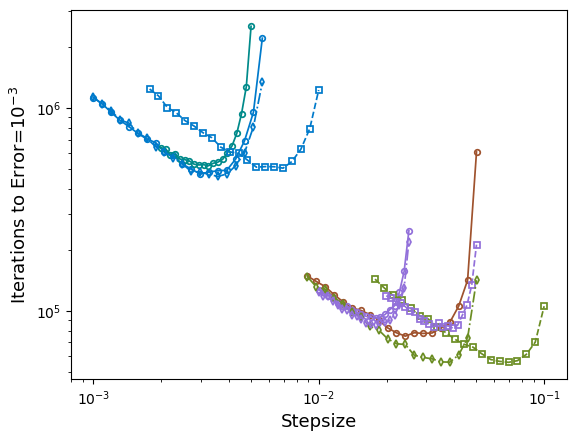

In [84]:
colors = [Color1, Color5, Color4, Color3, Color1, Color2, Color3, Color1, Color2, Color3] 
alphas = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# number_of_points = [10, 10, 9, 10, 6, 10, 7]
labels = ["EM", "HLM", "MM", "SH", "EM_TT", "LM_TT", "SH_TT", "EM_ST", "LM_ST", "SH_ST"]
line_styles = ['-', '-', '-', '-', '--', '--', '--', '-.', '-.', '-.']
marker_styles = ['o', 'o', 'o', 'o', 's', 's', 's', 'd', 'd', 'd']
stepsizes = [np.logspace(-3, -2.25, 20), np.logspace(-2.05, -1.3, 20), np.logspace(-2.7, -2.3, 20), np.logspace(-2.0, -1.6, 20), np.logspace(-2.75, -2.0, 20), np.logspace(-1.75, -1.0, 20), np.logspace(-1.70, -1.30, 20), np.logspace(-3.0, -2.25, 20), np.logspace(-2.05, -1.30, 20),  np.logspace(-2.0, -1.6, 20)]
plot_time_complexity([EM_orig_time, HLM_time, MM_orig_time, SH_orig_time, EM_TT_time, LM_TT_time, SH_TT_time, EM_ST_time, LM_ST_time, SH_ST_time], stepsizes=stepsizes, marker_styles=marker_styles, line_styles = line_styles, alphas= alphas, colors=colors)
plt.savefig("time_complexity.pdf")

In [29]:
def get_minimum_and_its_uncertainty(data_file, stepsizes):
    data_array = data_file['data']
    mean = np.mean(data_array, axis=0)
    std = np.std(data_array, axis=0)
    # std in the mean
    std = std / np.sqrt(data_array.shape[0])
    min_idx = np.argmin(mean)
    # compute stepsize of minimum index
    min_stepsize = stepsizes[min_idx]
    return mean[min_idx], std[min_idx], min_stepsize

In [30]:
for idx, data_file in enumerate([EM_orig_time, EM_TT_time, EM_ST_time, LM_TT_time, LM_ST_time, HLM_time, SH_orig_time, SH_TT_time, SH_ST_time, MM_orig_time]):
    mean, std, min_stepsize = get_minimum_and_its_uncertainty(data_file, stepsizes[idx])
    print("Minimum for {} is {} +- {} at stepsize {}".format(labels[idx], mean, std, min_stepsize))

Minimum for EM is 473703.5 +- 8134.987599058986 at stepsize 0.002976351441631319
Minimum for EM_TT is 505917.25 +- 9024.7095846846 at stepsize 0.0069519279617756054
Minimum for EM_ST is 460589.0833333333 +- 8075.389922018422 at stepsize 0.003181497446088679
Minimum for LM_TT is 55760.25 +- 907.3957220410906 at stepsize 0.06951927961775606
Minimum for LM_ST is 55881.666666666664 +- 829.2568457382175 at stepsize 0.038157415168210584
Minimum for HLM is 75052.08333333333 +- 1639.2972153906987 at stepsize 0.024222029365833706
Minimum for SH is 92110.08333333333 +- 1425.9584938244154 at stepsize 0.01789087489923219
Minimum for SH_TT is 82203.75 +- 1286.2025465344896 at stepsize 0.039331167860186894
Minimum for SH_ST is 85292.66666666667 +- 1332.3586706094536 at stepsize 0.01789087489923219
Minimum for MM is 519483.4166666667 +- 9000.168190712264 at stepsize 0.03239860535626308


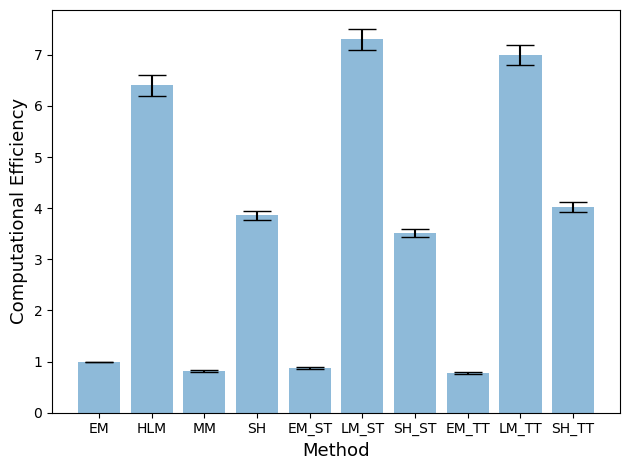

In [87]:
methods = ['EM', 'HLM', 'MM', 'SH', 'EM_ST', 'LM_ST', 'SH_ST', 'EM_TT', 'LM_TT', 'SH_TT']
computational_efficiency = [1.0, 6.4, 0.82, 3.86, 0.87, 7.3, 3.51, 0.77, 7.0, 4.02]
error = [0.0, 0.2, 0.02, 0.09, 0.02, 0.2, 0.08, 0.02, 0.2, 0.10]

# plot a bar chart of computational efficiencies with their errors shown
fig, ax = plt.subplots()
ax.bar(methods, computational_efficiency, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Computational Efficiency', fontsize=13)
ax.set_xlabel('Method', fontsize=13)
ax.yaxis.grid(False)
plt.tight_layout()

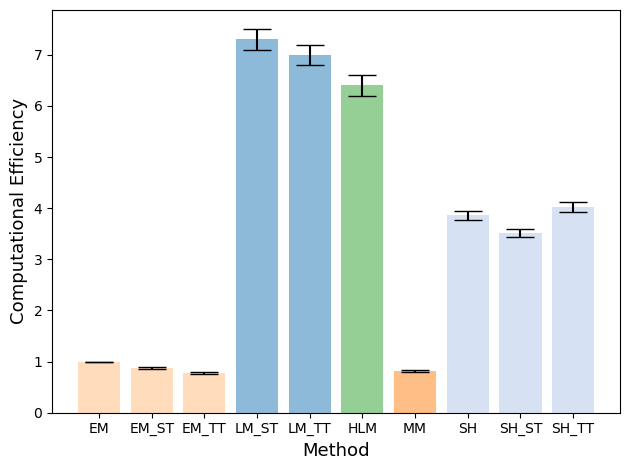

In [96]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['EM', 'HLM', 'MM', 'SH', 'EM_ST', 'LM_ST', 'SH_ST', 'EM_TT', 'LM_TT', 'SH_TT']
computational_efficiency = [1.0, 6.4, 0.82, 3.86, 0.87, 7.3, 3.51, 0.77, 7.0, 4.02]
error = [0.0, 0.2, 0.02, 0.09, 0.02, 0.2, 0.08, 0.02, 0.2, 0.10]

methods = ['EM', 'EM_ST', 'EM_TT', 'LM_ST', 'LM_TT', 'HLM', 'MM', 'SH', 'SH_ST', 'SH_TT']
computational_efficiency = [1.0, 0.87, 0.77, 7.3, 7.0, 6.4, 0.82, 3.86, 3.51, 4.02]
error = [0.0, 0.02, 0.02, 0.2, 0.2, 0.2, 0.02, 0.09, 0.08, 0.10]

# Extract the two-letter codes from methods
codes = [method[:2] for method in methods]

# Create a dictionary to map each code to a unique color
color_dict = {code: plt.cm.tab20(i) for i, code in enumerate(set(codes))}

# Create a list of colors for each method
colors = [color_dict[code] for code in codes]

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(methods, computational_efficiency, yerr=error, align='center', alpha=0.5, ecolor='black',
       capsize=10, color=colors)

ax.set_ylabel('Computational Efficiency', fontsize=13)
ax.set_xlabel('Method', fontsize=13)
ax.yaxis.grid(False)
plt.tight_layout()

# Create a legend for the color groups
handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[code]) for code in color_dict]
labels = list(color_dict.keys())
# plt.legend(handles, labels, loc='upper right')

plt.savefig("computational_efficiency.pdf")


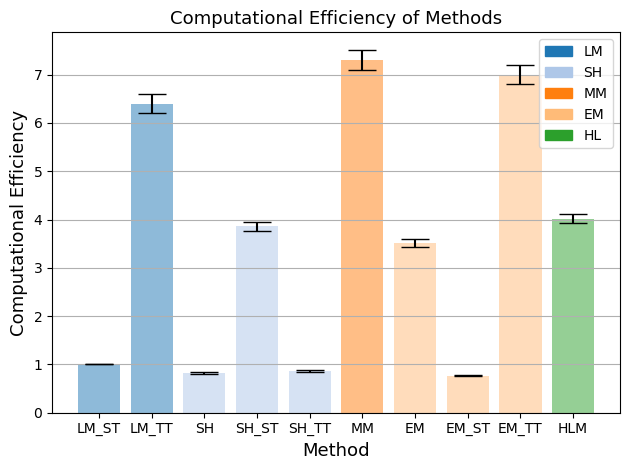

In [91]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['EM', 'HLM', 'MM', 'SH', 'EM_ST', 'LM_ST', 'SH_ST', 'EM_TT', 'LM_TT', 'SH_TT']
computational_efficiency = [1.0, 6.4, 0.82, 3.86, 0.87, 7.3, 3.51, 0.77, 7.0, 4.02]
error = [0.0, 0.2, 0.02, 0.09, 0.02, 0.2, 0.08, 0.02, 0.2, 0.10]

# Extract the two-letter codes from methods
codes = [method[:2] for method in methods]

# Create a dictionary to map each code to a unique color
color_dict = {code: plt.cm.tab20(i) for i, code in enumerate(set(codes))}

# Create a list of colors for each method
colors = [color_dict[code] for code in codes]

# Create a dictionary that maps each color to a list of methods with that color
color_methods = {color: [] for color in color_dict.values()}
for method, color in zip(methods, colors):
    color_methods[color].append(method)

# Sort the methods within each color group and concatenate them
sorted_methods = []
for color in color_dict.values():
    sorted_methods += sorted(color_methods[color])

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(sorted_methods, computational_efficiency, yerr=error, align='center', alpha=0.5, ecolor='black',
       capsize=10, color=[color_dict[method[:2]] for method in sorted_methods])

ax.set_ylabel('Computational Efficiency', fontsize=13)
ax.set_xlabel('Method', fontsize=13)
ax.set_title('Computational Efficiency of Methods', fontsize=13)
ax.yaxis.grid(True)
plt.tight_layout()

# Create a legend for the color groups
handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[code]) for code in color_dict]
labels = list(color_dict.keys())
plt.legend(handles, labels, loc='upper right')

plt.show()


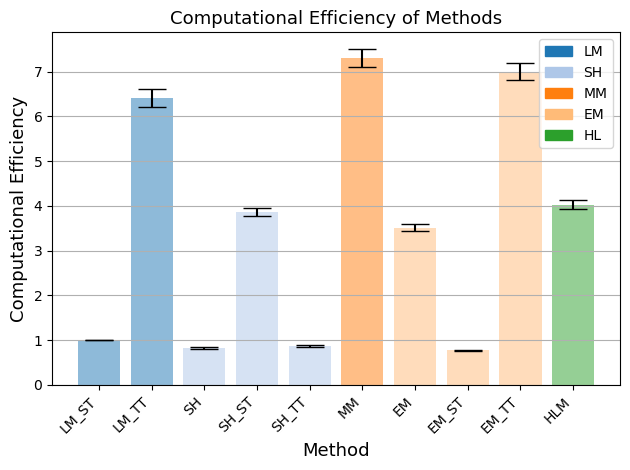

In [92]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['EM', 'HLM', 'MM', 'SH', 'EM_ST', 'LM_ST', 'SH_ST', 'EM_TT', 'LM_TT', 'SH_TT']
computational_efficiency = [1.0, 6.4, 0.82, 3.86, 0.87, 7.3, 3.51, 0.77, 7.0, 4.02]
error = [0.0, 0.2, 0.02, 0.09, 0.02, 0.2, 0.08, 0.02, 0.2, 0.10]

# Extract the two-letter codes from methods
codes = [method[:2] for method in methods]

# Create a dictionary to map each code to a unique color
color_dict = {code: plt.cm.tab20(i) for i, code in enumerate(set(codes))}

# Create a list of colors for each method
colors = [color_dict[code] for code in codes]

# Create a dictionary that maps each color to a list of methods with that color
color_methods = {color: [] for color in color_dict.values()}
for method, color in zip(methods, colors):
    color_methods[color].append(method)

# Sort the methods within each color group and concatenate them
sorted_methods = []
for color in color_dict.values():
    sorted_methods += sorted(color_methods[color])

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(range(len(sorted_methods)), computational_efficiency, yerr=error, align='center', alpha=0.5, ecolor='black',
       capsize=10, color=[color_dict[method[:2]] for method in sorted_methods])

ax.set_ylabel('Computational Efficiency', fontsize=13)
ax.set_xlabel('Method', fontsize=13)
ax.set_title('Computational Efficiency of Methods', fontsize=13)
ax.yaxis.grid(True)

# Update the tick labels to match the sorted methods
ax.set_xticks(range(len(sorted_methods)))
ax.set_xticklabels(sorted_methods, rotation=45, ha='right')

plt.tight_layout()

# Create a legend for the color groups
handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[code]) for code in color_dict]
labels = list(color_dict.keys())
plt.legend(handles, labels, loc='upper right')

plt.show()


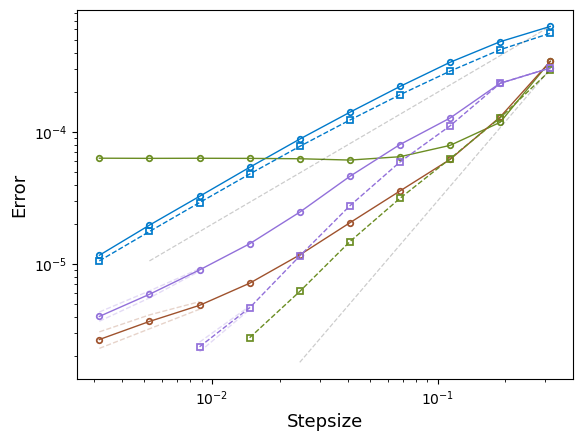

In [25]:
# 2D convergence plots

Slate_Blue = (0/256, 122/256, 204/256) #(106/256, 90/256, 205/256)
Color2 = (107/256, 142/256, 35/256) #(0/256, 128/256, 128/256)
Color3 = (147/256, 112/256, 219/256) #(218/256, 165/256, 32/256)
Color4 =  (0/256, 139/256, 139/256) #(85/256, 107/256, 47/256)
Color5 = (160/256, 82/256, 45/256) #(169/256, 169/256, 169/256)
colors = [Slate_Blue, Color2, Color5, Color3, Slate_Blue, Color2, Color3] 
alphas = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
number_of_points = [10, 10, 10, 10, 10, 7, 8]
error_points = [None, None, (7,10), (7,10), None, (6,7), (6,8)]
labels = ["EM", "LM", "HLM", "SH", "EM_time_transformed", "LM_time_transformed", "SH_time_transformed"]
line_styles = ['-', '-', '-', '-', '--', '--', '--']
#line_styles = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
marker_styles = ['o', 'o', 'o', 'o', 's', 's', 's']
ax = plot_convergence([EM_orig_2D, NLM_orig_2D, HLM_orig_2D, SH_orig_2D, EM_TT_2D, NLM_TT_2D, SH_TT_2D], error_points = error_points, marker_styles=marker_styles, line_styles = line_styles, alphas= alphas, colors=colors, number_of_points= number_of_points, labels=labels, stepsizes=np.logspace(-2.5, -0.5, 10), save=True, gradient_1_offset=0.0020, gradient_2_offset=0.003)
